<a href="https://colab.research.google.com/github/daniyal214/AI-Q2-learning-resources/blob/master/Cat_vs_Dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/daniyal214/Cat-vs-Dog-Classification-CNN.git

Cloning into 'Cat-vs-Dog-Classification-CNN'...
remote: Enumerating objects: 37400, done.
remote: Total 37400 (delta 0), reused 0 (delta 0), pack-reused 37400
Receiving objects: 100% (37400/37400), 810.22 MiB | 37.45 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Checking out files: 100% (37503/37503), done.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
from tensorflow import keras
import os
from keras.preprocessing.image import load_img, ImageDataGenerator
import cv2
from keras.layers import BatchNormalization

In [3]:
filenames = os.listdir('/content/Cat-vs-Dog-Classification-CNN/dogs-vs-cats/train')
categories = []

for filename in filenames:
    category = filename.split('.')[0]
    
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)
        
df = pd.DataFrame({
    'Filename':filenames,
    'Category':categories
})

In [4]:
df.head()

,Filename,Category
0,cat.10938.jpg,0
1,cat.9066.jpg,0
2,dog.3718.jpg,1
3,cat.11439.jpg,0
4,cat.3519.jpg,0


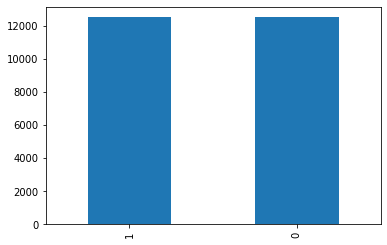

In [5]:
df['Category'].value_counts().plot.bar()

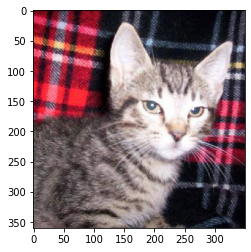

In [6]:
plt.imshow(load_img('/content/Cat-vs-Dog-Classification-CNN/dogs-vs-cats/train/'+filenames[5]))

In [7]:
cv2.imread('/content/Cat-vs-Dog-Classification-CNN/dogs-vs-cats/train/'+filenames[6]).shape

(438, 499, 3)

In [8]:
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [9]:
cnn = keras.Sequential([
    #cnn
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)),
    BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    
    layers.Dense(500, activation='relu'),
    layers.Dense(100, activation='relu'),
    
    
    layers.Dense(2, activation='softmax'),
    
])

cnn.compile(optimizer='adam',
            loss = 'categorical_crossentropy',
            metrics=['accuracy']
           )

In [10]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [11]:
earlystopping = EarlyStopping(patience=10)

In [12]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=2,
                                           verbose=1, min_lr=0.00001)

In [13]:
callbacks = [earlystopping, learning_rate_reduction]

In [14]:
df['Category'] = df['Category'].replace({0:'cat', 1:'dog'})

In [15]:
import sklearn

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
train_df, validate_df = train_test_split(df, test_size=0.2, random_state=123)

In [18]:
train_df.shape

(20000, 2)

In [19]:
validate_df.shape

(5000, 2)

In [20]:
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [21]:
train_df.shape[0]

20000

In [22]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]

In [23]:
train_df.head()

,Filename,Category
0,cat.10871.jpg,cat
1,dog.2806.jpg,dog
2,dog.2563.jpg,dog
3,cat.4498.jpg,cat
4,cat.1523.jpg,cat


In [24]:
train_datagen = ImageDataGenerator(
    rotation_range=20,
    brightness_range=(0.8,1.2),
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    rescale= 1./255,
    width_shift_range=0.1,
    height_shift_range=0.1
    )

train_generator = train_datagen.flow_from_dataframe(train_df,
                                                   '/content/Cat-vs-Dog-Classification-CNN/dogs-vs-cats/train/',
                                                   x_col= 'Filename',
                                                   y_col='Category',
                                                   target_size=IMAGE_SIZE,
                                                   class_mode='categorical',
                                                   batch_size=20)

Found 20000 validated image filenames belonging to 2 classes.


In [25]:
validation_datagen = ImageDataGenerator(
    rescale= 1./255,
    )

validation_generator = validation_datagen.flow_from_dataframe(validate_df,
                                                   '/content/Cat-vs-Dog-Classification-CNN/dogs-vs-cats/train/',
                                                   x_col= 'Filename',
                                                   y_col='Category',
                                                   target_size=IMAGE_SIZE,
                                                   class_mode='categorical',
                                                   batch_size=20)

Found 5000 validated image filenames belonging to 2 classes.


In [26]:
history = cnn.fit_generator(train_generator,
                            steps_per_epoch= total_train//20,
                            epochs=30,
                            validation_data=validation_generator,
                            validation_steps= total_validate//20,
#                             callbacks = callbacks
                           )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
1000/1000 [==============================] - 183s 151ms/step - loss: 0.6475 - accuracy: 0.6825 - val_loss: 0.5900 - val_accuracy: 0.6738
Epoch 2/30
1000/1000 [==============================] - 150s 150ms/step - loss: 0.5061 - accuracy: 0.7523 - val_loss: 0.4715 - val_accuracy: 0.7658
Epoch 3/30
1000/1000 [==============================] - 149s 149ms/step - loss: 0.4482 - accuracy: 0.7936 - val_loss: 0.6048 - val_accuracy: 0.7338
Epoch 4/30
1000/1000 [==============================] - 148s 148ms/step - loss: 0.3952 - accuracy: 0.8217 - val_loss: 0.4500 - val_accuracy: 0.8070
Epoch 5/30
1000/1000 [==============================] - 149s 148ms/step - loss: 0.3527 - accuracy: 0.8454 - val_loss: 0.6621 - val_accuracy: 0.7492
Epoch 6/30
1000/1000 [==============================] - 148s 148ms/step - loss: 0.3290 - accuracy: 0.8572 - val_loss: 0.3725 - val_accuracy: 0.8454
Epoch 7/30
1000/1000 [==============================] - 149s 149ms/step - loss: 0.3123 - accuracy: 0.8648 - val_

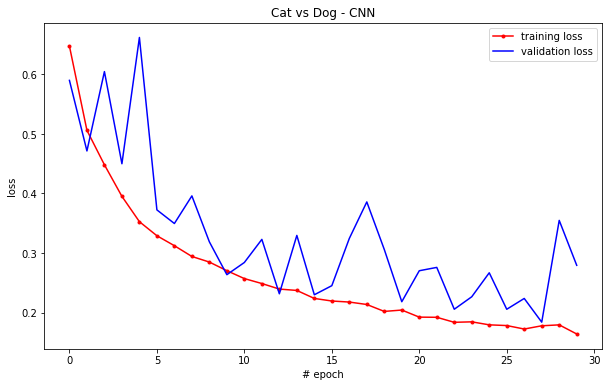

In [33]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'],'r',marker='.', label='training loss')
plt.plot(history.history['val_loss'],'blue',label='validation loss')
plt.xlabel('# epoch')
plt.ylabel('loss')
plt.title('Cat vs Dog - CNN')
plt.legend()
plt.show()

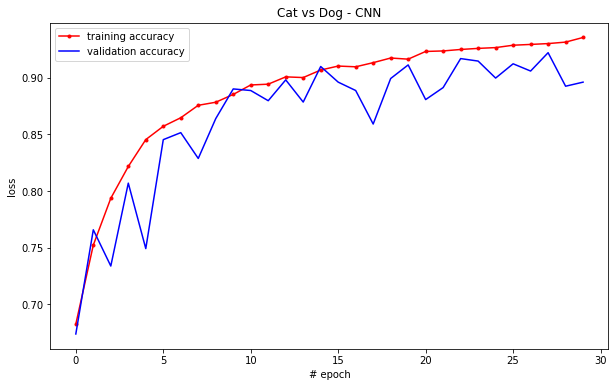

In [31]:
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'],'r', marker='.' ,label='training accuracy')
plt.plot(history.history['val_accuracy'],'b',label='validation accuracy')
plt.xlabel('# epoch')
plt.ylabel('loss')
plt.title('Cat vs Dog - CNN')
plt.legend()
plt.show()